In [260]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

In [261]:
weather = pd.read_fwf("Mexicoweather.txt", header = None)

In [262]:
#weather

In [263]:
len(weather)

1714

In [264]:
data_list = []
for i in range(weather.shape[0]):
   row = list(weather.iloc[i,1:])
   temp_list = []
   for r in row:
       n = re.findall(r'\d+', str(r))
       if len(n) > 0:
           temp_list.append(int(n[0]))
   data_list.append(temp_list)

In [265]:
weather2 = pd.DataFrame(data_list)
weather2 = weather2 / 10
weather2.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,31.0,31.0,31.0,32.0,33.0,32.0,32.0,33.0,33.0,33.0,...,33.0,33.0,33.0,33.0,33.0,33.0,34.0,33.0,32.0,999.9
1,15.0,15.0,16.0,15.0,16.0,16.0,16.0,16.0,16.0,17.0,...,17.0,17.0,17.0,18.0,19.0,19.0,17.0,18.0,16.0,999.9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,999.9
3,31.0,31.0,31.0,30.0,30.0,30.0,31.0,31.0,31.0,30.0,...,33.0,34.0,35.0,33.0,31.0,31.0,32.0,31.0,30.0,29.0
4,20.0,16.0,16.0,15.0,15.0,15.0,16.0,16.0,17.0,17.0,...,17.0,19.0,19.0,19.0,18.0,16.0,15.0,17.0,15.0,16.0


In [266]:
weather2 = weather2.replace([999.9,99.9,0], np.NaN)


In [267]:
first_col = pd.DataFrame(weather[0])

In [268]:
#print(first_col)

In [269]:
weather2.insert(loc=0, column='id', value=first_col)

In [270]:
el = weather2['id'].str[-4:]
weather2.insert(loc=1, column='element', value=el)
weather2['id'] = weather2['id'].str[:-4]
weather2.head()

,id,element,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
0,MX000017004195504,TMAX,31.0,31.0,31.0,32.0,33.0,32.0,32.0,33.0,...,33.0,33.0,33.0,33.0,33.0,33.0,34.0,33.0,32.0,NaN
1,MX000017004195504,TMIN,15.0,15.0,16.0,15.0,16.0,16.0,16.0,16.0,...,17.0,17.0,17.0,18.0,19.0,19.0,17.0,18.0,16.0,NaN
2,MX000017004195504,PRCP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN
3,MX000017004195505,TMAX,31.0,31.0,31.0,30.0,30.0,30.0,31.0,31.0,...,33.0,34.0,35.0,33.0,31.0,31.0,32.0,31.0,30.0,29.0
4,MX000017004195505,TMIN,20.0,16.0,16.0,15.0,15.0,15.0,16.0,16.0,...,17.0,19.0,19.0,19.0,18.0,16.0,15.0,17.0,15.0,16.0


In [271]:
len(weather2)

1714

In [272]:
weather2['id'] = weather2['id'].str[:2] + weather2['id'].str[6:]

In [274]:
dates = weather2['id'].str[7:]
year = dates.str[:4]
weather2.insert(loc=2, column='year', value=year)
month = dates.str[-2:]
weather2.insert(loc=3, column='month', value=month)
weather2.head()

ValueError: cannot insert year, already exists

In [275]:
weather2['id'] = weather2['id'].str[:7]
weather2.head()


,id,element,year,month,0,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
0,MX17004,TMAX,1955,04,31.0,31.0,31.0,32.0,33.0,32.0,...,33.0,33.0,33.0,33.0,33.0,33.0,34.0,33.0,32.0,NaN
1,MX17004,TMIN,1955,04,15.0,15.0,16.0,15.0,16.0,16.0,...,17.0,17.0,17.0,18.0,19.0,19.0,17.0,18.0,16.0,NaN
2,MX17004,PRCP,1955,04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN
3,MX17004,TMAX,1955,05,31.0,31.0,31.0,30.0,30.0,30.0,...,33.0,34.0,35.0,33.0,31.0,31.0,32.0,31.0,30.0,29.0
4,MX17004,TMIN,1955,05,20.0,16.0,16.0,15.0,15.0,15.0,...,17.0,19.0,19.0,19.0,18.0,16.0,15.0,17.0,15.0,16.0


In [276]:
my_data = pd.melt(weather2, id_vars=['id', 'element', 'year', 'month'], var_name= 'day')
#pd.to_numeric(my_data['day'])

my_data['day'] = my_data['day'] + 1
#my_data

#my_data['date'] = my_data['year'].map(str) + '-' + my_data['month'].map(str) + '-' + my_data['day']
#my_data['date'] = pd.to_datetime(my_data['date'])

In [277]:
len(my_data)

53134

In [278]:
my_data.head()

,id,element,year,month,day,value
0,MX17004,TMAX,1955,04,1,31.0
1,MX17004,TMIN,1955,04,1,15.0
2,MX17004,PRCP,1955,04,1,NaN
3,MX17004,TMAX,1955,05,1,31.0
4,MX17004,TMIN,1955,05,1,20.0


In [279]:
my_data = my_data.pivot_table(index=['id', 'year', 'month', 'day'], columns="element", values="value")
my_data.reset_index(drop=False, inplace=True)

In [280]:
my_data.head()
weather2.head()

,id,element,year,month,0,1,2,3,4,5,...,21,22,23,24,25,26,27,28,29,30
0,MX17004,TMAX,1955,04,31.0,31.0,31.0,32.0,33.0,32.0,...,33.0,33.0,33.0,33.0,33.0,33.0,34.0,33.0,32.0,NaN
1,MX17004,TMIN,1955,04,15.0,15.0,16.0,15.0,16.0,16.0,...,17.0,17.0,17.0,18.0,19.0,19.0,17.0,18.0,16.0,NaN
2,MX17004,PRCP,1955,04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN
3,MX17004,TMAX,1955,05,31.0,31.0,31.0,30.0,30.0,30.0,...,33.0,34.0,35.0,33.0,31.0,31.0,32.0,31.0,30.0,29.0
4,MX17004,TMIN,1955,05,20.0,16.0,16.0,15.0,15.0,15.0,...,17.0,19.0,19.0,19.0,18.0,16.0,15.0,17.0,15.0,16.0


In [281]:
my_data = my_data.replace(np.nan, 0)

In [282]:
my_data.describe()

element,day,PRCP,TMAX,TMIN
count,13010.000000,13010.000000,13010.000000,13010.000000
mean,15.685396,3.831153,23.527410,13.394896
std,8.782916,9.415272,9.679413,4.500140
min,1.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,24.000000,12.500000
50%,16.000000,0.000000,26.000000,14.600000
75%,23.000000,2.200000,28.900000,16.000000
max,31.000000,88.600000,38.500000,29.000000


### Compute the daily average tmax for the years 1960 - 1969.  For example, compute the mean tmax for Jan 1 by averaging the tmax value on Jan 1 from 1960 to 1969.  At the end, you should have an array of 366 values--one for each day of the year including Feb 29.  

In [283]:
my_data['year'] = pd.to_numeric(my_data['year'])
sub_data60 = my_data[(my_data['year'] >= 1960) & (my_data['year'] <= 1969)]
avgs_60 =pd.DataFrame((sub_data60.groupby(['month', 'day']).mean())['TMAX'])
avgs_60

TMAX
month day           
01    1    25.611111
      2    25.844444
      3    25.955556
      4    25.622222
      5    25.055556
      6    24.555556
      7    25.333333
      8    25.133333
      9    25.066667
      10   24.300000
      11   24.111111
      12   24.522222
      13   24.533333
      14   24.633333
      15   24.555556
      16   24.066667
      17   25.366667
      18   25.466667
      19   25.211111
      20   25.522222
      21   25.422222
      22   25.644444
      23   25.766667
      24   25.488889
      25   26.177778
      26   26.200000
      27   26.000000
      28   26.433333
      29   26.077778
      30   25.711111
...              ...
12    2    23.840000
      3    23.380000
      4    22.930000
      5    22.900000
      6    22.930000
      7    24.000000
      8    23.690000
      9    23.260000
      10   23.570000
      11   23.680000
      12   24.520000
      13   24.120000
      14   24.370000
      15   24.090000
      16   24.050000
      17   24.080000
      18   23.980000
      19   23.750000
      20   23.280000
      21   23.800000
      22   23.900000
      23   23.770000
      24   23.910000
      25   24.300000
      26   24.170000
      27   23.800000
      28   24.580000
      29   24.310000
      30   24.340000
      31   24.540000

[366 rows x 1 columns]

In [284]:
sub_data60.head()

element,id,year,month,day,PRCP,TMAX,TMIN
1676,MX17004,1960,01,1,0.0,26.0,12.0
1677,MX17004,1960,01,2,0.0,27.0,14.0
1678,MX17004,1960,01,3,0.0,26.0,16.0
1679,MX17004,1960,01,4,0.0,27.0,15.0
1680,MX17004,1960,01,5,0.0,25.0,15.0


### Compute the daily average tmax for the years 2000 - 2010.  For example, compute the mean tmax for Jan 1 by averaging the tmax value on Jan 1 from 2000 to 2010.  At the end, you should have an array of 366 values--one for each day of the year including Feb 29.    

There are several dates that do not have any data, so there were not 366 values. There were only 357. There was probably some sort of error when I was cleaning up the data, but I tried different methods and still couldn't figure out ho


In [285]:
my_data['year'] = pd.to_numeric(my_data['year'])
sub_data20 = my_data[(my_data['year'] >= 2000) & (my_data['year'] <= 2011)]
avgs_20 = pd.DataFrame((sub_data20.groupby(['month', 'day']).mean())['TMAX'])
avgs_20

TMAX
month day           
01    2    30.000000
      3    27.300000
      4    28.800000
      5    29.450000
      6    29.166667
      7    27.800000
      8    28.133333
      9    27.400000
      10   17.800000
      11   21.825000
      12   28.650000
      13   27.600000
      14   28.325000
      15   27.500000
      16   27.525000
      17   27.400000
      18   21.250000
      19   27.100000
      20   27.050000
      21   28.500000
      22   28.775000
      23   28.300000
      24   28.800000
      25   28.250000
      27   30.500000
      28   30.000000
      29   31.850000
      30   27.350000
      31   30.250000
02    1    31.300000
...              ...
11    28   27.850000
      29   29.650000
      30   30.075000
12    1    29.620000
      2    24.057143
      3    27.633333
      4    28.500000
      5    27.100000
      6    28.480000
      7    25.200000
      8    27.300000
      9    26.500000
      11   29.100000
      12   28.900000
      13   27.533333
      14   30.550000
      15   28.420000
      16   28.300000
      17   27.250000
      18   27.200000
      19   25.500000
      20   26.080000
      22   25.900000
      24   26.800000
      25   13.150000
      26   27.400000
      27   26.150000
      28   26.400000
      29   12.200000
      30   28.000000

[357 rows x 1 columns]

### Make a scatterplot of the averages from the 1960s against the averages from the 2000s.  Also plot the line with 0 intercept and 1 slope on the scatterplot.  Be sure the label the axes and make a figure title.

Could not put on the same scatterplot since I could not get the two dataframe to be of the same size (366)

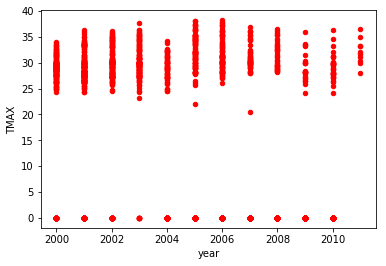

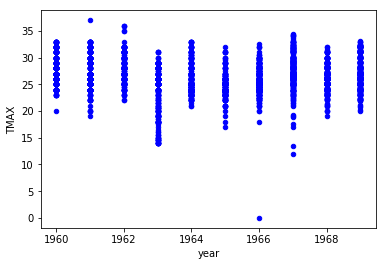

In [286]:
sub_data20.plot(kind='scatter',x='year',y='TMAX',color='red')
sub_data60.plot(kind='scatter',x='year',y='TMAX',color='blue')
plt.show()

### Make a line plot of the average tmax values versus time.  Plot both the averages for 1960 - 1969 and 2000 - 2009 on the same graphs.  Use different colors for the different decades.  Include a legend and sensible axis labels. 

### Compute the number of missing tmax values by year in the dataset.  Plot the number of missing tmax value by year.

In [287]:
missing = my_data[my_data['TMAX'] == 0]
missing.groupby('year')['TMAX'].apply(lambda x: (x==0).sum()).reset_index(name='count')

,year,count
0,1966,1
1,1973,2
2,1976,1
3,1978,1
4,1979,1
5,1989,27
6,1990,173
7,1991,120
8,1992,104
9,1993,130


### Comment on anything interesting that you learned from parts (1) - (5).

One thing that I found interesting, not necessarily pertaining to the context of the data, but how important good data cleaning skills really is. If it weren't for comparing my outcomes with other students, there would be many things that I would not have caught. IT just goes to show how important it is to understand the data, and look over every outcome to make sure nothing strange is happening. In my case, many data points went missing somewhere in the process which ended up messing up the whole latter part of the assignment. It would have been much more complex and more of a problem if it were a real world problem I was trying to work with.